# Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [34]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer

# Modeling

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import  CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

#### Import the csv Data as Pandas DataFrame

In [22]:
df = pd.read_csv('data/stud.csv')

#### Show top 5 Records

In [23]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Preparing X and Y Variables

In [24]:
X = df.drop(columns=["math_score"],axis=1)

In [25]:
X.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'reading_score', 'writing_score'],
      dtype='object')

In [26]:
y = df['math_score']

In [27]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [28]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())
print()

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())
print()

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']

Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']

Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [31]:
# columns Transformer with 3 type of Transfomer

num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

In [33]:
print(num_features), print(cat_features)

Index(['reading_score', 'writing_score'], dtype='object')
Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')


(None, None)

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


Std = StandardScaler()
ohe = OneHotEncoder()


processor = ColumnTransformer(
    [ 
        ("OneHotEncoder",ohe,cat_features),
        ("StandardScaler",Std,num_features)
    ]
)



In [37]:
X = processor.fit_transform(X)

In [38]:
X.shape

(1000, 19)

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X, y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

### Evaluate the model

In [ ]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true,predicted) 
    mse = mean_squared_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_Square = r2_score(true,predicted)
    return mae, rmse, r2_Square

In [45]:
models = {
    "LinearRegression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge":Ridge(),
    "KNeighborsRegressor":KNeighborsRegressor(),
    "DecisionTreeRegressor" : DecisionTreeRegressor(),
    "RandomForestRegressor" : RandomForestRegressor(),
    "XGBRegressor" : XGBRegressor(),
    "CatBoostRegressor" : CatBoostRegressor(),
    "AdaBoostRegressor" : AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # make prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evalute Train  and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train,y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test,y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print(" - Root Mean Squared Error : {:.4f}".format(model_train_rmse))
    print(" - Mean Absolute Error : {:.4f}".format(model_train_mae))
    print(" - R2 Score : {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for test set')
    print(" - Root Mean Squared Error : {:.4f}".format(model_test_rmse))
    print(" - Mean Absolute Error : {:.4f}".format(model_test_mae))
    print("- R2 Score : {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')


LinearRegression
Model performance for Training set
 - Root Mean Squared Error : 5.3231
 - Mean Absolute Error : 4.2667
 - R2 Score : 0.8743
----------------------------------
Model performance for test set
 - Root Mean Squared Error : 5.3940
 - Mean Absolute Error : 4.2148
- R2 Score : 0.8804


Lasso
Model performance for Training set
 - Root Mean Squared Error : 6.5938
 - Mean Absolute Error : 5.2063
 - R2 Score : 0.8071
----------------------------------
Model performance for test set
 - Root Mean Squared Error : 6.5197
 - Mean Absolute Error : 5.1579
- R2 Score : 0.8253


Ridge
Model performance for Training set
 - Root Mean Squared Error : 5.3233
 - Mean Absolute Error : 4.2650
 - R2 Score : 0.8743
----------------------------------
Model performance for test set
 - Root Mean Squared Error : 5.3904
 - Mean Absolute Error : 4.2111
- R2 Score : 0.8806


KNeighborsRegressor
Model performance for Training set
 - Root Mean Squared Error : 5.7077
 - Mean Absolute Error : 4.5167
 - R2 Sc

### Results

In [46]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,LinearRegression,0.880433
8,AdaBoostRegressor,0.853316
5,RandomForestRegressor,0.852901
7,CatBoostRegressor,0.851632
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,KNeighborsRegressor,0.783813
4,DecisionTreeRegressor,0.773936


### Linear Regression

In [47]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred) * 100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 88.04


### plot y_pred and y_test

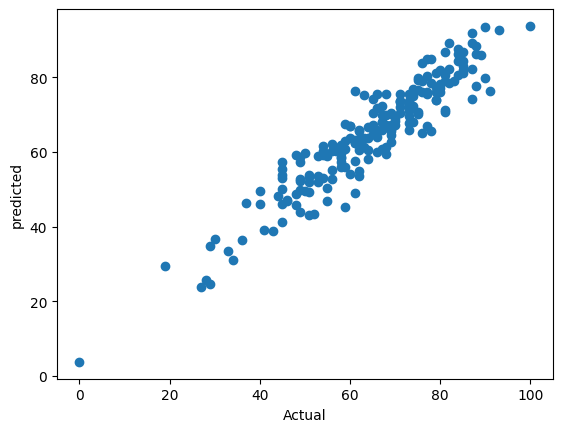

In [49]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel("predicted");

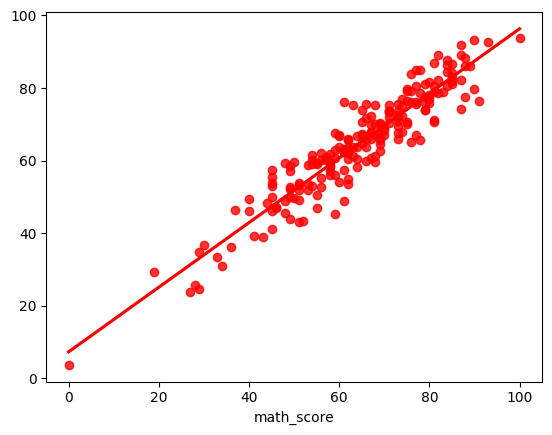

In [52]:
import seaborn as sns

sns.regplot(x=y_test, y = y_pred,ci=False,color='r');

#### Differnce between Actual and Predicted Values

In [53]:
pred_df = pd.DataFrame({'Actual Value': y_test, "predicted Value" : y_pred, 'Differce': y_test - y_pred})
pred_df

,Actual Value,predicted Value,Differce
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
